In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QN_kYPSEJxHTCtRcx28ZHhW1wseLrndm_rRX0ldEAABn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-nzunlla85yjfhx'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
corr_matrix=df.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


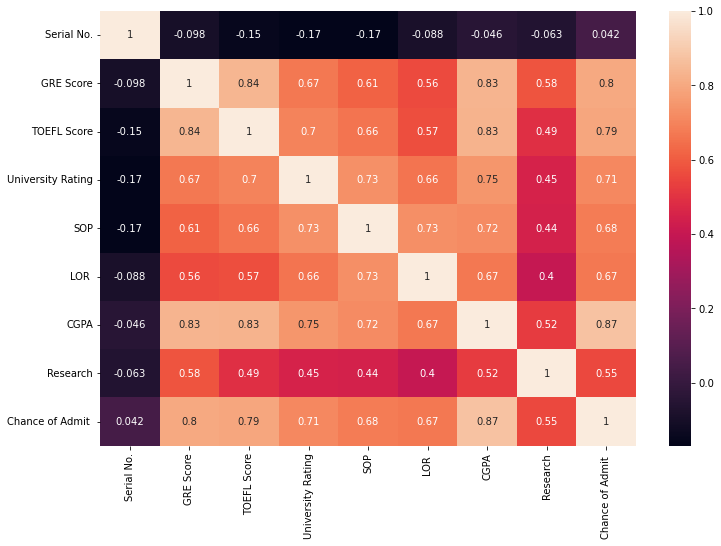

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

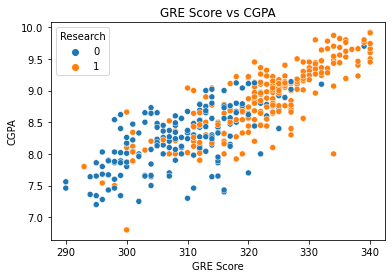

In [5]:
%matplotlib inline
import seaborn as sns
data =df
sns.scatterplot(data["GRE Score"],data["CGPA"],data=df,hue=data["Research"])
plt.title("GRE Score vs CGPA")
plt.show()

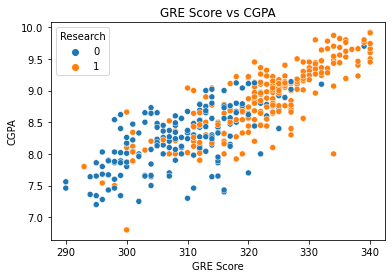

In [6]:
%matplotlib inline
import seaborn as sns
data =df
sns.scatterplot(data["GRE Score"],data["CGPA"],data=df,hue=data["Research"])
plt.title("GRE Score vs CGPA")
plt.show()

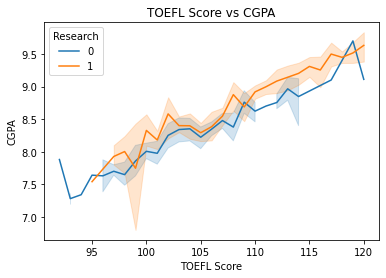

In [7]:
%matplotlib inline
import seaborn as sns
data=df
sns.lineplot(data["TOEFL Score"],data["CGPA"],hue=data["Research"])
plt.title("TOEFL Score vs CGPA")
plt.show()

In [8]:
%matplotlib
import seaborn as sns

sns.barplot(data=df,x='SOP',y='CGPA',palette='Set2',hue='Research')
plt.title('SOP vs CGPA')
plt.show

Using matplotlib backend: <object object at 0x7f1157305b10>


<function matplotlib.pyplot.show(*, block=None)>

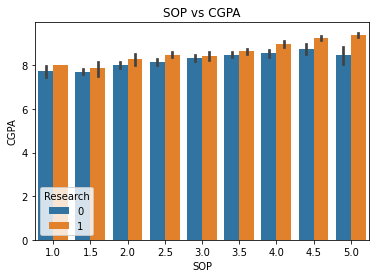

In [9]:
%matplotlib inline
import seaborn as sns
data=df
sns.barplot(data["SOP"],data["CGPA"],hue=data["Research"])
plt.title("SOP vs CGPA")
plt.show()

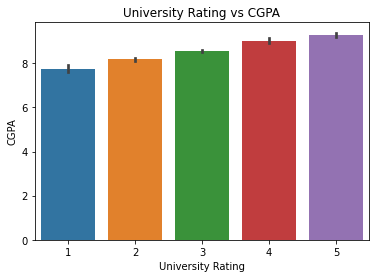

In [10]:
%matplotlib inline
import seaborn as sns
data=df
sns.barplot(data["University Rating"],data["CGPA"])
plt.title("University Rating vs CGPA")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [16]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","CGPA", "Research"]]
y = df["TOEFL Score"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 1.000


In [19]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 1.000


In [20]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 1.000


In [21]:
!pip install ibm_watson_machine_learning

In [22]:
from ibm_watson_machine_learning import APIClient
import json

In [23]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "apikey": "GXIq0WvfLYobrmTPaccsVpwEML_PHzJjoRIhFnQkfjkM",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [24]:
wml_client=APIClient(wml_credentials)

In [25]:
wml_client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------------  ------------------------
ID                                    NAME                          CREATED
94323d73-dce9-4466-b44f-f786feec549b  online deployment university  2022-11-15T09:48:36.933Z
5e27b477-1bb8-4a48-8b0f-81b3147dffe1  multilenear demo              2022-11-14T16:45:46.614Z
------------------------------------  ----------------------------  ------------------------


In [26]:
SPACE_ID="5e27b477-1bb8-4a48-8b0f-81b3147dffe1"

In [27]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [28]:

wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [29]:
import sklearn
sklearn.__version__

'1.0.2'

In [30]:
MODEL_NAME="ibmdeployment"
DEPLOYEMENT_NAME="multilenear demo"
DEMO_MODEL= "model"

In [31]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [32]:
software_spec_uid = wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid
model_props={
    wml_client.repository.ModelMetaNames.NAME: "MODEL_NAME",
    wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}


In [33]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data="x_train", 
    training_target="y_train"
)


Failure during getting trained models details. (GET https://us-south.ml.cloud.ibm.com/ml/v4/trainings/model?version=2021-06-24&space_id=5e27b477-1bb8-4a48-8b0f-81b3147dffe1)
Status code: 404, body: {"trace":"db6690b45067eb20929ae91d36ed4094","errors":[{"code":"training_job_run_not_found","message":"Backend persistence error (404): GET request failed","more_info":"http://watson-ml-api.mybluemix.net/"}],"status_code":"404"}
Unexpected type of 'model parameter', expected: model path / training_id, actual: 'model'.


UnexpectedType: Unexpected type of 'model parameter', expected: model path / training_id, actual: 'model'.

In [34]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:"DEPLOYMENT_NAME",
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [35]:
model_details




NameError: name 'model_details' is not defined

In [36]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
3,322,110,3,3.5,8.67,1
18,318,110,3,4.0,8.80,0
202,340,120,5,4.5,9.91,1
250,320,104,3,3.0,8.57,1
274,315,100,1,2.0,7.95,0
...,...,...,...,...,...,...
71,336,112,5,5.0,9.76,1
106,329,111,4,4.5,9.18,1
270,306,105,2,2.5,8.22,1
348,302,99,1,2.0,7.25,0


In [37]:
multiple_lin_reg.predict(x_train)

array([[110.],
       [110.],
       [120.],
       [104.],
       [100.],
       [107.],
       [110.],
       [108.],
       [116.],
       [106.],
       [100.],
       [111.],
       [ 99.],
       [103.],
       [104.],
       [105.],
       [109.],
       [104.],
       [100.],
       [114.],
       [104.],
       [108.],
       [107.],
       [114.],
       [105.],
       [101.],
       [102.],
       [100.],
       [106.],
       [101.],
       [105.],
       [105.],
       [ 99.],
       [101.],
       [120.],
       [100.],
       [ 93.],
       [116.],
       [109.],
       [110.],
       [104.],
       [103.],
       [106.],
       [ 94.],
       [119.],
       [111.],
       [110.],
       [106.],
       [102.],
       [110.],
       [108.],
       [113.],
       [102.],
       [110.],
       [104.],
       [109.],
       [111.],
       [102.],
       [110.],
       [112.],
       [106.],
       [109.],
       [102.],
       [109.],
       [105.],
       [112.],
       [10

In [38]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "O-xbXqcCv2iPGZfem_krJ8KX-kQ2h5bKybYpPwY-gOfl"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]], "values": [[326, 110, 2, 3.5, 4, 9.23, 1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/uaep_deployment/predictions?version=2022-11-12', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.8448151378927107]]]}]}
